Running power flow solver...
Testcase: test/data/gc_12_47_1/node.glm


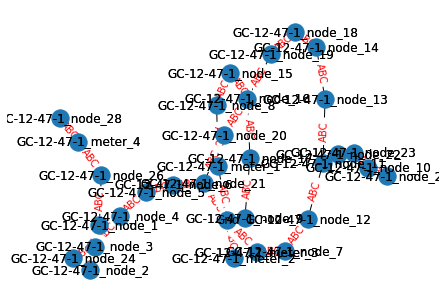

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

from logic.powerflowsettings import PowerFlowSettings
from logic.powerflow import FilePowerFlow
from logic.graphanalyzer import GraphAnalyzer

# path to the grid network RAW file
#casename = 'test/data/positiveseq/GS-4_prior_solution.RAW'
#casename = 'test/data/positiveseq/IEEE-14_prior_solution.RAW'
#casename = 'test/data/positiveseq/IEEE-118_prior_solution.RAW'
#casename = 'test/data/positiveseq/ACTIVSg500_prior_solution_fixed.RAW'
#casename = 'test/data/positiveseq/PEGASE-9241_flat_start.RAW'
#casename = 'test/data/positiveseq/PEGASE-13659_flat_start.RAW'
#casename = 'test/data/positiveseq/GS-4_stressed.RAW'
#casename = 'test/data/positiveseq/IEEE-14_stressed_1.RAW'
#casename = 'test/data/positiveseq/IEEE-14_stressed_2_fixed.RAW'
casename = 'test/data/gc_12_47_1/node.glm'
#casename = 'test/data/ieee_four_bus/node.glm'

print("Running power flow solver...")
print(f'Testcase: {casename}')

settings = PowerFlowSettings(debug=False, max_iters=50, flat_start=False, infeasibility_analysis=False, tx_stepping=False, voltage_limiting=False)

powerflow = FilePowerFlow(casename, settings)

ga = GraphAnalyzer()

ga.load_network(powerflow.network)

G = ga.G

pos=nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_labels(G, pos, ga.node_labels)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=ga.edge_labels,
    font_color='red'
)
plt.margins(x=0.1)
